# Assignment 1: Introduction to Data Science and Python - Group 4

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

---



### **Question (a)**

#### **Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.**

**Import Libraries**



In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_rows', 100)

**Load datasets**

We selected the following datasets:

*   GDP per capita: https://ourworldindata.org/grapher/gdp-per-capita-maddison-2020
*   Life expectancy: https://ourworldindata.org/grapher/life-expectancy?tab=map
*   GDP: https://ourworldindata.org/grapher/gross-domestic-product?tab=chart



In [87]:
gdp_per_captita = pd.read_csv('/content/gdp-per-capita-maddison-2020.csv')
life_expectancy = pd.read_csv('/content/life-expectancy.csv')
gdp = pd.read_csv('/content/gross-domestic-product.csv')

**Clean datasets**

*   Droped unnecessary column '417485-annotations' from gdp_per_captita dataset
*   Droped entities which are not a country from all datasets
*   Droped 'NaN' values from all datasets



In [88]:
# Drop unnecessary column '417485-annotations' 
gdp_per_captita = gdp_per_captita.drop('417485-annotations', axis=1)

# Drop Entities which are not a country
gdp_per_captita = gdp_per_captita[gdp_per_captita['Code'] != 'OWID_WRL']
life_expectancy = life_expectancy[life_expectancy['Code'] != 'OWID_WRL']
gdp = gdp[gdp['Code'] != 'OWID_WRL']

# Drop 'NaN' values
life_expectancy = life_expectancy[life_expectancy['Code'].notnull()]
gdp = gdp[gdp['Code'].notnull()]

**Merge datasets**

Joined common entries of gdp_per_captita and life_expectancy datasets

In [89]:
# Merge gdp_per_captita and life_expectancy datasets
gdp_per_captita_merged = pd.merge(gdp_per_captita, life_expectancy, on=['Entity', 'Code', 'Year'])

gdp_per_captita_merged

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical)
0,Afghanistan,AFG,1950,1156.0000,27.7
1,Afghanistan,AFG,1951,1170.0000,28.0
2,Afghanistan,AFG,1952,1189.0000,28.4
3,Afghanistan,AFG,1953,1240.0000,28.9
4,Afghanistan,AFG,1954,1245.0000,29.2
...,...,...,...,...,...
12426,Zimbabwe,ZWE,2014,1594.0000,58.8
12427,Zimbabwe,ZWE,2015,1560.0000,59.6
12428,Zimbabwe,ZWE,2016,1534.0000,60.3
12429,Zimbabwe,ZWE,2017,1582.3662,60.7


**Plot**

We selected four distinct years (1900, 1950, 1990, and 2018) to demonstrate how life expectancy has changed over time across different intervals of GDP per capita, and we chose these 4 years for the following reasons:
- We care about the situation of life expectancy vs. GDP per capita in the present and data collected of 2018 is the latest.
- 30-50 years is an appropriate interval to observe the changes from the perspective of social development.
- The 4 sets of years have included the changes of the last over 100 years which contain enough information. If too many years are selected, it will be difficult for people to read the figure.

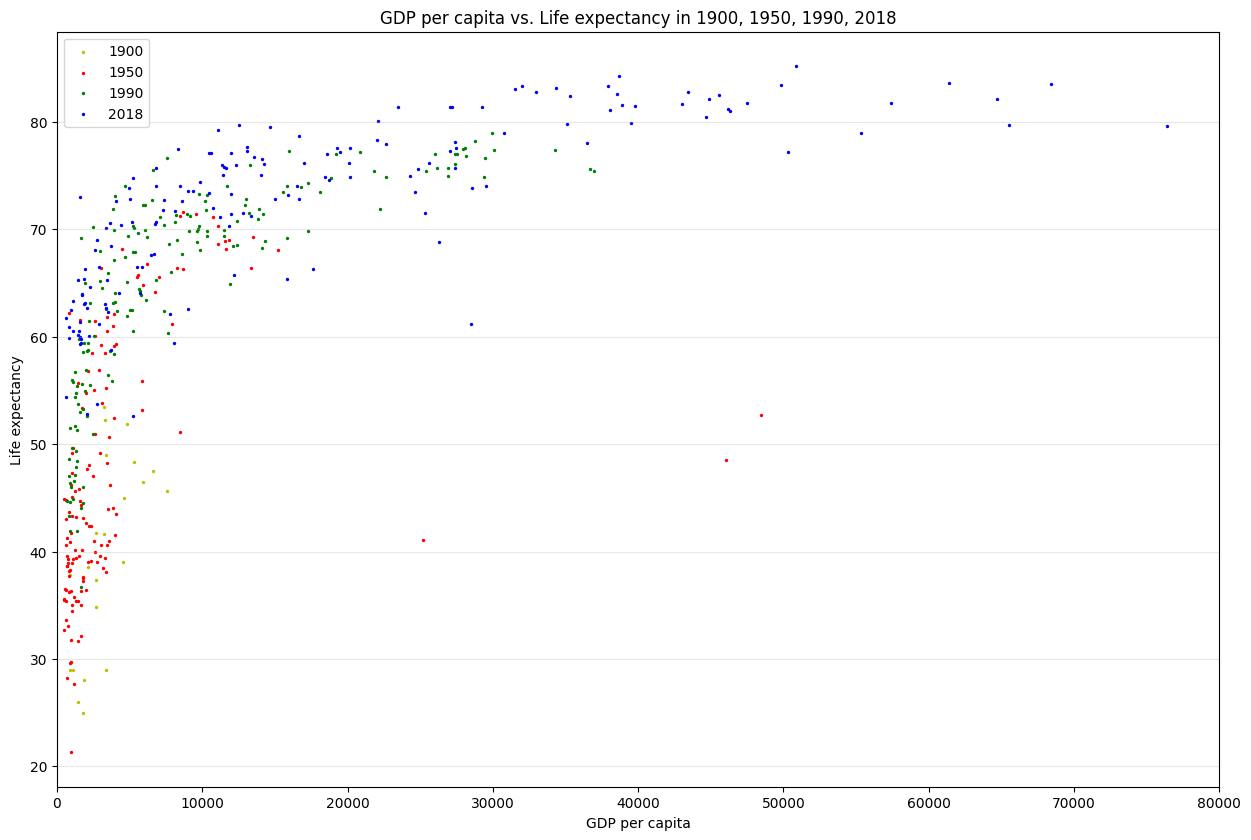

In [90]:
df_1900 = gdp_per_captita_merged[gdp_per_captita_merged['Year'] == 1900]
df_1950 = gdp_per_captita_merged[gdp_per_captita_merged['Year'] == 1950]
df_1990 = gdp_per_captita_merged[gdp_per_captita_merged['Year'] == 1990]
df_2018 = gdp_per_captita_merged[gdp_per_captita_merged['Year'] == 2018]

plt.figure(figsize=[15,10])

plt.scatter(df_1900['GDP per capita'], df_1900['Life expectancy at birth (historical)'], s=2, color='y')
plt.scatter(df_1950['GDP per capita'], df_1950['Life expectancy at birth (historical)'], s=2, color='r')
plt.scatter(df_1990['GDP per capita'], df_1990['Life expectancy at birth (historical)'], s=2, color='g')
plt.scatter(df_2018['GDP per capita'], df_2018['Life expectancy at birth (historical)'], s=2, color='b')

plt.legend(['1900', '1950', '1990', '2018'])
plt.grid(axis = 'y', zorder=0, alpha=0.3)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('GDP per capita vs. Life expectancy in 1900, 1950, 1990, 2018')
plt.xlim(0, 80000)

plt.show()

### **Question (b)**

#### **Which countries have a life expectancy higher than one standard deviation above the mean?**


Joined common entries of gdp, gdp_per_captita and life_expectancy datasets.

All questions are answered relative to data from the year 2018 (df_YEAR).

In [91]:
# Merge gdp, gdp_per_captita and life_expectancy datasets
df = pd.merge(gdp_per_captita_merged, gdp, on=['Entity', 'Code', 'Year'])

# Get data entries of YEAR
YEAR = 2018
df_YEAR = df[df['Year'] == YEAR]

df_YEAR

,Entity,Code,Year,GDP per capita,Life expectancy at birth (historical),GDP (constant 2015 US$)
16,Afghanistan,AFG,2018,1934.5550,63.1,20323487744
55,Albania,ALB,2018,11104.1660,79.2,12702457856
114,Algeria,DZA,2018,14228.0250,76.1,175426093056
153,Angola,AGO,2018,7771.4420,62.1,110764474368
212,Argentina,ARG,2018,18556.3830,77.0,583118094336
...,...,...,...,...,...,...
7442,Uzbekistan,UZB,2018,11220.3700,71.1,100427399168
7477,Vietnam,VNM,2018,6814.1420,74.0,234736467968
7506,Yemen,YEM,2018,2284.8900,64.6,36789669888
7565,Zambia,ZMB,2018,3534.0337,62.3,23747586048


In [92]:
# Life expectancy mean and standard deviation
life_expectancy_mean = df_YEAR['Life expectancy at birth (historical)'].mean()
life_expectancy_std = df_YEAR['Life expectancy at birth (historical)'].std()

# Countries with high life expectancy (higher than mean + std)
high_life_expectancy = df_YEAR[df_YEAR['Life expectancy at birth (historical)'] > (life_expectancy_mean + life_expectancy_std)]

# Print results
print('Number of countries have a life expectancy higher than one standard deviation above the mean:',high_life_expectancy['Entity'].count())
print('\nList of countries have a life expectancy higher than one standard deviation above the mean:')
high_life_expectancy[['Entity', 'Life expectancy at birth (historical)']]

Number of countries have a life expectancy higher than one standard deviation above the mean: 30

List of countries have a life expectancy higher than one standard deviation above the mean:


,Entity,Life expectancy at birth (historical)
300,Australia,83.4
359,Austria,81.7
619,Belgium,81.5
1144,Canada,82.1
1811,Cyprus,81.4
1958,Denmark,81.0
2446,Finland,81.6
2505,France,82.6
2706,Germany,81.2
2824,Greece,81.4


**Plot**

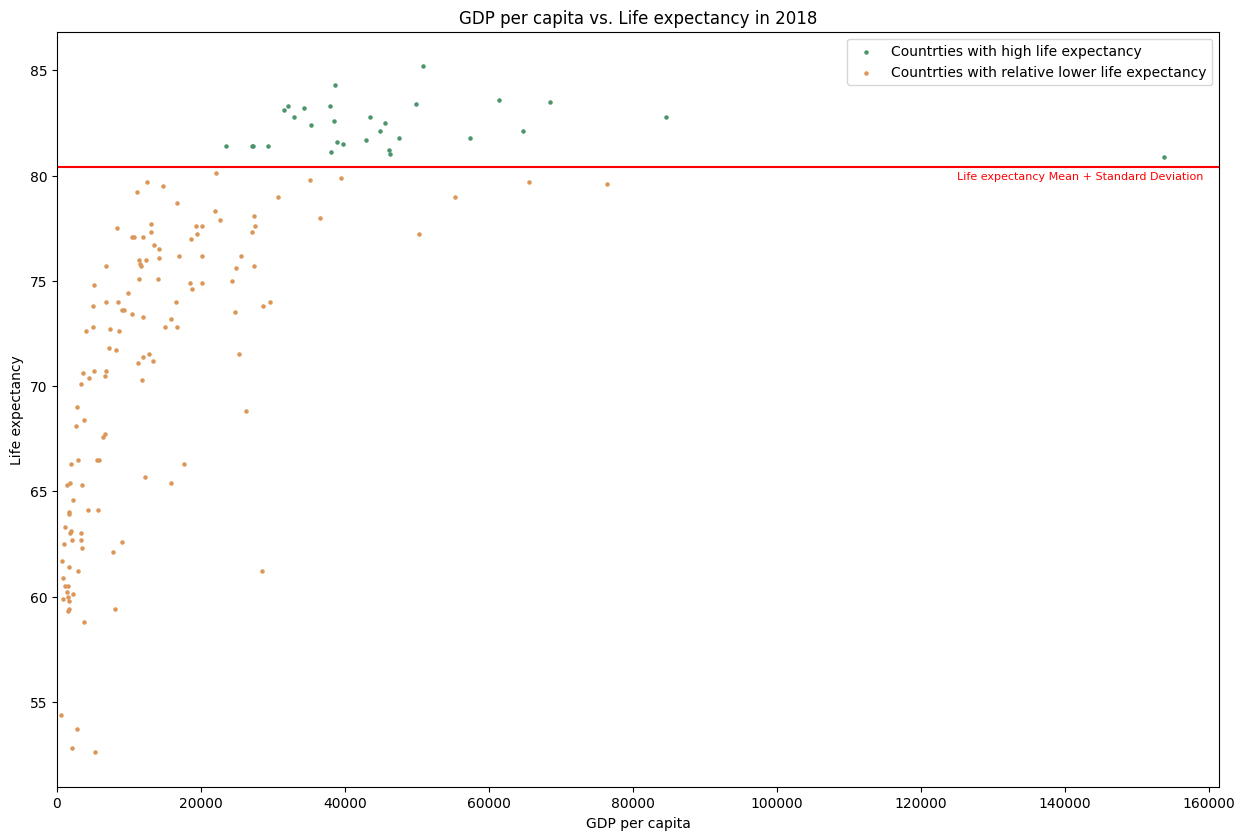

In [93]:
plt.figure(figsize=[15,10])

# Plot ountries with high life expectancy
plt.scatter(high_life_expectancy['GDP per capita'], high_life_expectancy['Life expectancy at birth (historical)'], s=5, color='#4C956C')

# Plot ountries with lower life expectancy
low_life_expectancy = df_YEAR[~df_YEAR['Entity'].isin(high_life_expectancy['Entity'])]
plt.scatter(low_life_expectancy['GDP per capita'], low_life_expectancy['Life expectancy at birth (historical)'], s=5, color='#DC965A')

# Plot Mean + Standard Deviation of life expectancy
plt.axhline(y=(life_expectancy_mean + life_expectancy_std), color='r', linestyle='-')
plt.text(125000, (life_expectancy_mean + life_expectancy_std) - 0.6, 'Life expectancy Mean + Standard Deviation', fontsize=8, color='r')

plt.legend(['Countrties with high life expectancy','Countrties with relative lower life expectancy'])
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('GDP per capita vs. Life expectancy in 2018')
plt.xlim(0)

plt.show()

### **Question (c)**

#### **Which countries have high life expectancy but have low GDP? (note: GDP and not GDP per capita in question c and d) Motivate how you have chosen to define “high” and “low”.**

**Definition:**

**High life expectancy** is considered every value higher than one standard deviation above the mean life expectency in the current dataset.

**Low GDP** is considered every value bellow the mean GDP in the current dataset.

In [94]:
# GDP mean
gdp_mean = df_YEAR['GDP (constant 2015 US$)'].mean()

# Countries with low GDP (lowr than mean - std) from the countries with high life expectancy
high_life_expectancy_low_gdp = high_life_expectancy[high_life_expectancy['GDP (constant 2015 US$)'] < gdp_mean]

# Print results
print('Number of countries with high life expectancy:', high_life_expectancy['Entity'].count())
print('Number of countries with high life expectancy and low GDP:', high_life_expectancy_low_gdp['Entity'].count())
print('\nCountries with high life expectancy and low GDP:')
high_life_expectancy_low_gdp[['Entity', 'Life expectancy at birth (historical)', 'GDP (constant 2015 US$)']]

Number of countries with high life expectancy: 30
Number of countries with high life expectancy and low GDP: 18

Countries with high life expectancy and low GDP:


,Entity,Life expectancy at birth (historical),GDP (constant 2015 US$)
359,Austria,81.7,408334532608
619,Belgium,81.5,484429955072
1811,Cyprus,81.4,23632267264
1958,Denmark,81.0,327708278784
2446,Finland,81.6,251667480576
2824,Greece,81.4,200141373440
3141,Hong Kong,85.2,337417502720
3193,Iceland,82.8,20351811584
3470,Ireland,82.1,353404289024
3494,Israel,82.8,340224147456


**Plot**

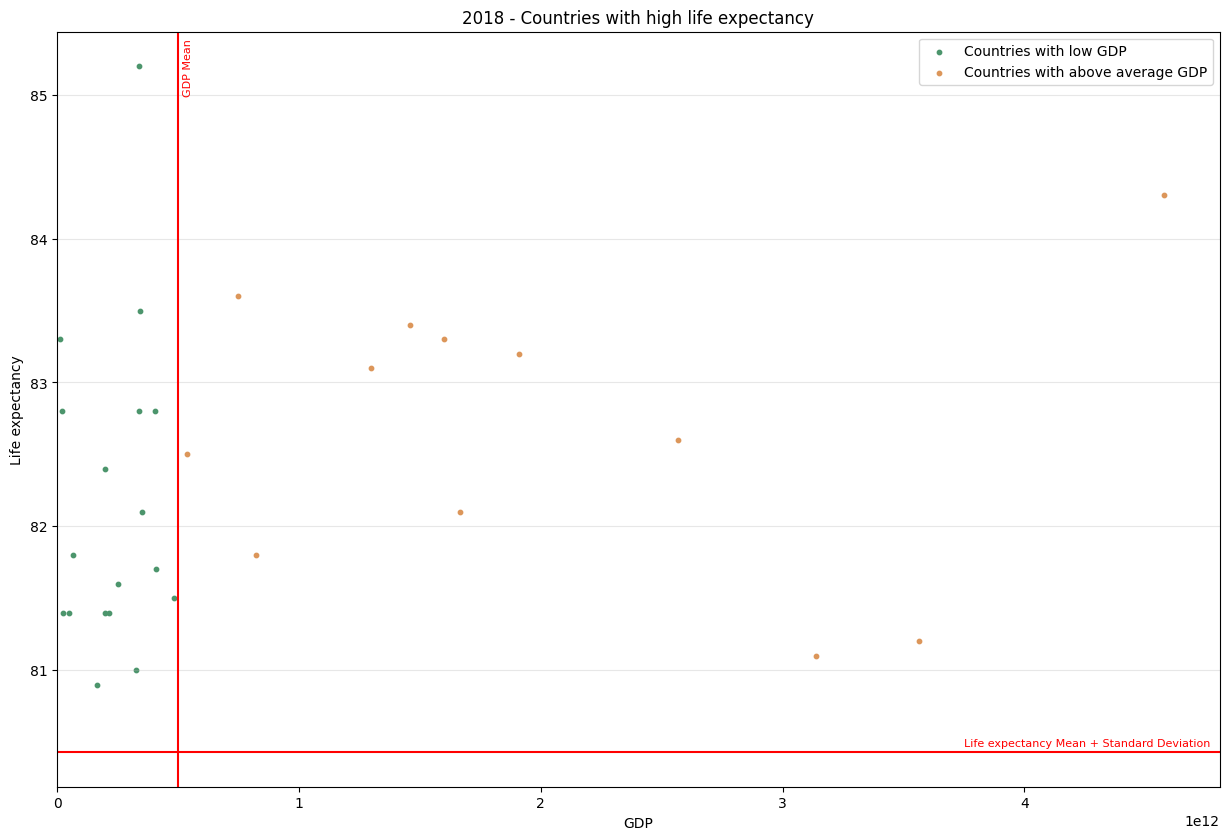

In [95]:
plt.figure(figsize=[15,10])

# Plot countries with high life expectancy and low GDP
plt.scatter(high_life_expectancy_low_gdp['GDP (constant 2015 US$)'], high_life_expectancy_low_gdp['Life expectancy at birth (historical)'], s=10, color='#4C956C')

# Plot countries with high life expectancy and above average GDP
high_life_expectancy_above_average_gdp = high_life_expectancy[~high_life_expectancy['Entity'].isin(high_life_expectancy_low_gdp['Entity'])]
plt.scatter(high_life_expectancy_above_average_gdp['GDP (constant 2015 US$)'], high_life_expectancy_above_average_gdp['Life expectancy at birth (historical)'], s=10, color='#DC965A')

# Plot Mean + Standard Deviation of life expectancy
plt.axhline(y=(life_expectancy_mean + life_expectancy_std), color='r', linestyle='-')
plt.text(3.75*1e12, (life_expectancy_mean + life_expectancy_std) + 0.04, 'Life expectancy Mean + Standard Deviation', fontsize=8, color='r')

# Plot Mean GDP
plt.axvline(x=gdp_mean, color='r', linestyle='-')
plt.text(gdp_mean + 2e10, 85, 'GDP Mean', fontsize=8, rotation=90, color='r')

plt.legend(['Countries with low GDP', 'Countries with above average GDP'])
plt.grid(axis = 'y', zorder=0, alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.title(str(YEAR) + ' - Countries with high life expectancy')
plt.xlim(0)

plt.show()

### **Question (d)**

#### **Does every strong economy (normally indicated by GDP) have high life expectancy?**

**Definition:**

Strong economies are considered countries with a high GDP. 

**High GDP** is considered every value higher than one standard deviation above the mean GDP in the current dataset.

In [96]:
# GDP standard deviation
gdp_std = df_YEAR['GDP (constant 2015 US$)'].std()

# Countries with high GDP (higher than mean + std)
high_gdp = df_YEAR[df_YEAR['GDP (constant 2015 US$)'] > (gdp_mean + gdp_std)]

# Countries with high life expectancy (higher than mean + std) from the contries with high GDP
high_gdp_high_life_expectancy = high_gdp[high_gdp['Life expectancy at birth (historical)'] > (life_expectancy_mean + life_expectancy_std)]

# Countries without high life expectancy from the contries with high GDP
high_gdp_low_life_expectancy = high_gdp[~high_gdp['Entity'].isin(high_gdp_high_life_expectancy['Entity'])]

# Print results
print('Number of countries with high GDP:', high_gdp['Entity'].count())
print('Number of countries with high GDP and high life expectancy:', high_gdp_high_life_expectancy['Entity'].count())
print('Number of countries with high GDP and relative low life expectancy:', high_gdp_low_life_expectancy['Entity'].count())

print('\nList of countries with high GDP and relative low life expectancy:')
high_gdp_low_life_expectancy[['Entity', 'Life expectancy at birth (historical)', 'GDP (constant 2015 US$)']]

Number of countries with high GDP: 7
Number of countries with high GDP and high life expectancy: 4
Number of countries with high GDP and relative low life expectancy: 3

List of countries with high GDP and relative low life expectancy:


,Entity,Life expectancy at birth (historical),GDP (constant 2015 US$)
1419,China,77.7,13493418852352
3252,India,70.7,2590898651136
7351,United States,79.0,19551980879872


**Plot**

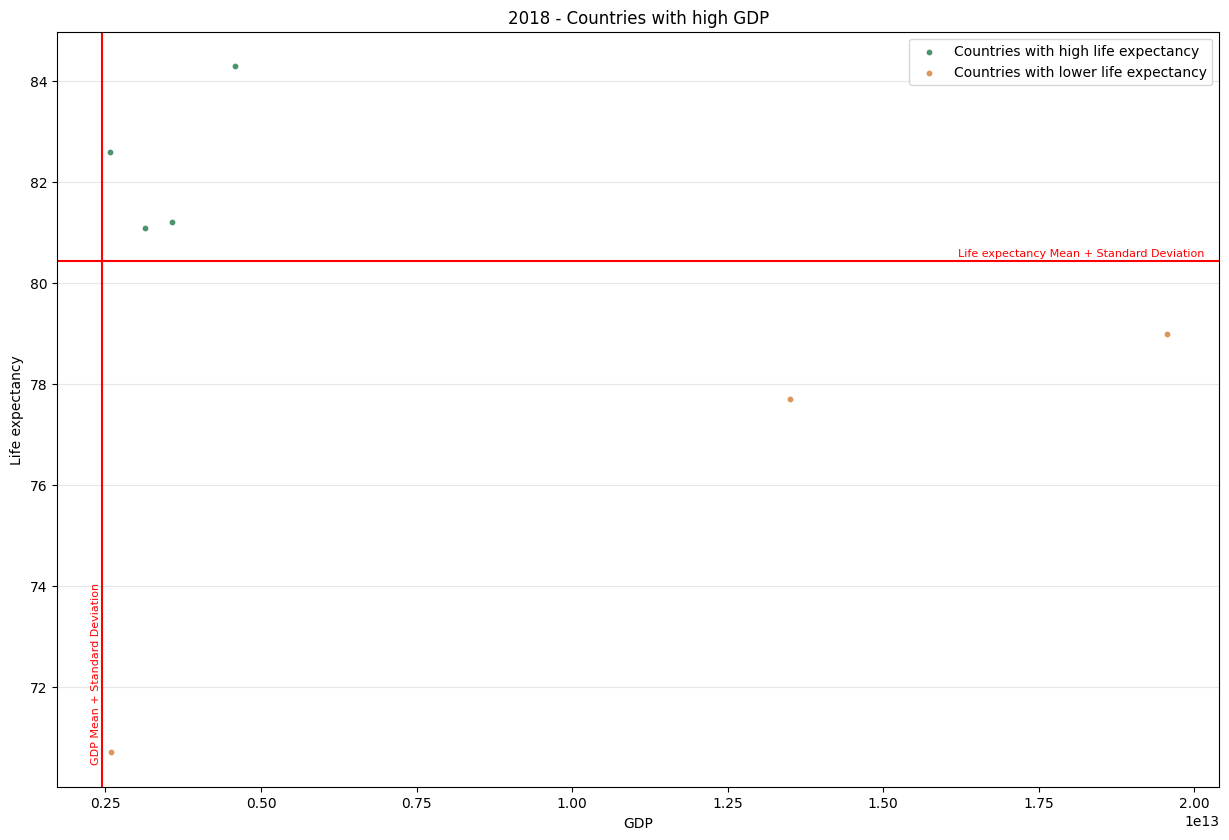

In [97]:
plt.figure(figsize=[15,10])

# Plot countries with high GDP
plt.scatter(high_gdp_high_life_expectancy['GDP (constant 2015 US$)'], high_gdp_high_life_expectancy['Life expectancy at birth (historical)'], s=10, color='#4C956C')
plt.scatter(high_gdp_low_life_expectancy['GDP (constant 2015 US$)'], high_gdp_low_life_expectancy['Life expectancy at birth (historical)'], s=10, color='#DC965A')

# Plot Mean + Standard Deviation of life expectancy
plt.axhline(y=(life_expectancy_mean + life_expectancy_std), color='r', linestyle='-')
plt.text(1.62*1e13, (life_expectancy_mean + life_expectancy_std) + 0.1, 'Life expectancy Mean + Standard Deviation', fontsize=8, color='r')

# Plot Mean GDP + Standard Deviation
plt.axvline(x=(gdp_mean + gdp_std), color='r', linestyle='-')
plt.text((gdp_mean + gdp_std) - 1.8e11, 70.5, 'GDP Mean + Standard Deviation', fontsize=8, rotation=90, color='r')

plt.legend(['Countries with high life expectancy','Countries with lower life expectancy'])
plt.grid(axis = 'y', zorder=0, alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.title(str(YEAR) + ' - Countries with high GDP')

plt.show()

### **Question (e)**

#### **Related to question d, what would happen if you use GDP per capita as an indicator of a strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.**

**Definition:**

Strong economies are considered countries with a high GDP per capita. 

**High GDP per capita** is considered every value higher than one standard deviation above the mean GDP per capita in the current dataset.

In [98]:
# GDP per capita mean and standard deviation
gdp_per_captita_mean = df_YEAR['GDP per capita'].mean()
gdp_per_captita_std = df_YEAR['GDP per capita'].std()

# Countries with high GDP per capita (higher than mean + std)
high_gdp_per_capita = df_YEAR[df_YEAR['GDP per capita'] > (gdp_per_captita_mean + gdp_per_captita_std)]

# Countries with high life expectancy (higher than mean + std) from the contries with high GDP per capita
high_gdp_per_capita_high_life_expectancy = high_gdp_per_capita[high_gdp_per_capita['Life expectancy at birth (historical)'] > (life_expectancy_mean + life_expectancy_std)]

# Countries without high life expectancy from the contries with high GDP per capita
high_gdp_per_capita_low_life_expectancy = high_gdp_per_capita[~high_gdp_per_capita['Entity'].isin(high_gdp_per_capita_high_life_expectancy['Entity'])]

# Print results
print('Number of countries with high GDP per capita:', high_gdp_per_capita['Entity'].count())
print('Number of countries with high GDP per capita and high life expectancy:', high_gdp_per_capita_high_life_expectancy['Entity'].count())
print('\nCountries with high GDP per capita and low life expectancy:')
high_gdp_per_capita_low_life_expectancy[['Entity', 'Life expectancy at birth (historical)', 'GDP per capita']]

Number of countries with high GDP per capita: 21
Number of countries with high GDP per capita and high life expectancy: 16

Countries with high GDP per capita and low life expectancy:


,Entity,Life expectancy at birth (historical),GDP per capita
427,Bahrain,79.9,39498.766
3823,Kuwait,79.7,65520.740
6032,Saudi Arabia,77.2,50304.750
7233,United Arab Emirates,79.6,76397.820
7351,United States,79.0,55334.740


**Plot**

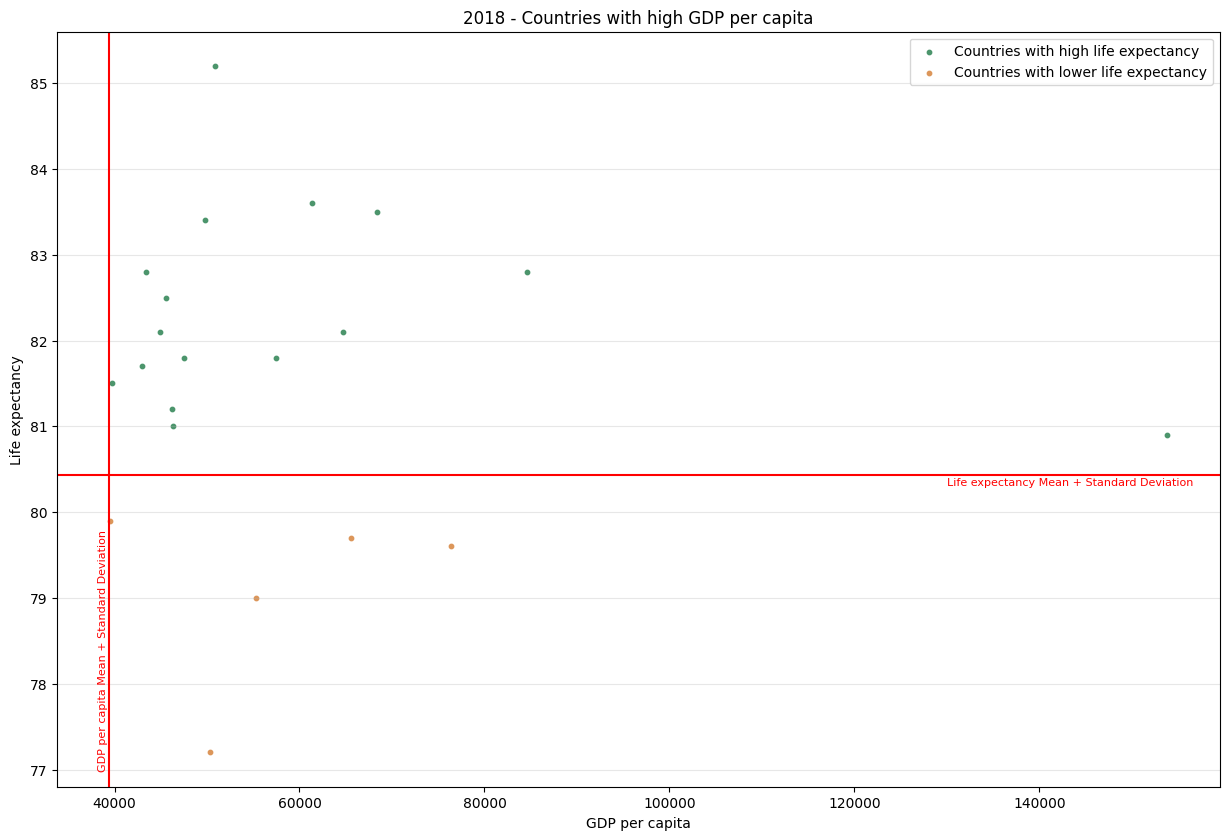

In [99]:
plt.figure(figsize=[15,10])

# Plot countries with high GDP per capita
plt.scatter(high_gdp_per_capita_high_life_expectancy['GDP per capita'], high_gdp_per_capita_high_life_expectancy['Life expectancy at birth (historical)'], s=10, color='#4C956C')
plt.scatter(high_gdp_per_capita_low_life_expectancy['GDP per capita'], high_gdp_per_capita_low_life_expectancy['Life expectancy at birth (historical)'], s=10, color='#DC965A')

# Plot Mean + Standard Deviation of life expectancy
plt.axhline(y=(life_expectancy_mean + life_expectancy_std), color='r', linestyle='-')
plt.text(130000, (life_expectancy_mean + life_expectancy_std) - 0.12, 'Life expectancy Mean + Standard Deviation', fontsize=8, color='r')

# Plot Mean GDP + Standard Deviation
plt.axvline(x=(gdp_per_captita_mean + gdp_per_captita_std), color='r', linestyle='-')
plt.text((gdp_per_captita_mean + gdp_per_captita_std) - 1200, 77, 'GDP per capita Mean + Standard Deviation', fontsize=8, rotation=90, color='r')

plt.legend(['Countries with high life expectancy','Countries with lower life expectancy'])
plt.grid(axis = 'y', zorder=0, alpha=0.3)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title(str(YEAR) + ' - Countries with high GDP per capita')

plt.show()

**Insights we get from comparing the results of d and e:**

- Nearly half(42.9%) of the high GDP countries have a life expectancy below the average. On the contrary, more than 76% of the countries with high GDP per capita have high life expectancy.
- The size of a country's GDP does not necessarily indicate the country's life expectancy. However, the GDP per capita level of a country may provide a better reflection of its life expectancy.
